In [19]:
## Import Packages
import pandas as pd
pd.set_option('display.max_columns',None)
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
from matplotlib.axes import Axes
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.decomposition import PCA
import time
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score, plot_confusion_matrix, confusion_matrix
sns.set()
# os.chdir('C:/Users/ctran/Documents/DSC_projects/ufc/UFC-Predictions/data')

In [31]:
## Read in data
data = pd.read_csv('data.csv')
# preprocessed = pd.read_csv('preprocessed_data.csv')
# raw_details = pd.read_csv('raw_fighter_details.csv')
# raw_total_data = pd.read_csv('raw_total_fight_data.csv')
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Kron Gracie,Charles Jourdain,Gary Copeland,2023-05-06,"Newark, New Jersey, USA",Blue,False,Featherweight,0.070312,0.009766,0.499258,0.487656,0.250000,0.593008,0.148438,0.781250,0.0,0.125,174.021484,85.443359,145.414062,68.640625,204.253906,114.007812,171.042969,90.853516,1.390625,0.500000,6.210938,3.292969,136.001953,53.580078,108.892578,39.660156,32.011719,27.068359,17.609375,11.363281,6.007812,4.794922,18.912109,17.617188,136.171875,54.664062,125.080078,54.462891,34.115234,27.853516,16.814453,12.207031,3.734375,2.925781,3.519531,1.970703,59.759766,247.783203,801.531250,27,0,0,1,2,4,6,0,0,0,1,2,1,0,Switch,175.26,175.26,145.0,0.000000,0.000000,0.315000,0.370000,0.250000,0.000000,0.500000,0.000000,0.000000,0.000000,105.000000,44.000000,151.000000,69.500000,118.000000,56.000000,155.000000,73.500000,2.000000,0.500000,0.000000,0.000000,91.500000,37.000000,114.000000,43.500000,4.000000,2.000000,29.000000,20.000000,9.500000,5.000000,8.000000,6.000000,96.000000,38.000000,133.000000,57.000000,8.000000,5.500000,17.000000,12.000000,1.000000,0.500000,1.000000,0.500000,39.000000,18.000000,513.000000,4,0,1,0,1,1,1,0,0,0,0,0,1,0,Southpaw,175.26,177.80,145.0,27.0,34.0
1,Belal Muhammad,Gilbert Burns,Keith Peterson,2023-05-06,"Newark, New Jersey, USA",Red,False,Welterweight,0.008484,0.188004,0.565166,0.415886,0.618139,0.090372,0.270535,0.000244,0.0,0.000,84.983316,42.0

In [32]:
data.isnull().sum()

R_fighter         0
B_fighter         0
Referee          32
date              0
location          0
               ... 
R_Height_cms     17
R_Reach_cms     413
R_Weight_lbs     15
B_age           172
R_age            76
Length: 144, dtype: int64

In [60]:
## Filter dataset to remove nulls in the Winner column
data['date'] = pd.to_datetime(data.date)
data = data[~data.Winner.isna()]

## We see that a fighter can either be in the red or blue corner. Typically the favorite is in the red corner and the underdog is in the blue corner
data[(data.R_fighter.str.contains('Cannonier')) | (data.B_fighter.str.contains('Cannonier'))].sort_values(by='date')


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,label
4065,Shawn Jordan,Jared Cannonier,John McCarthy,2015-01-03,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Switch,180.34,195.58,185.0,0.062500,0.375000,0.483750,0.398594,0.406250,0.005000,0.000000,0.015625,0.00000,0.000000,44.968750,23.171875,50.437500,18.953125,76.359375,47.671875,52.875000,20.781250,2.640625,1.562500,0.234375,0.031250,39.578125,19.078125,42.015625,13.656250,3.796875,2.500000,5.046875,3.171875,1.593750,1.593750,3.375000,2.125000,24.703125,9.375000,37.875000,11.218750,4.140625,1.812500,11.812500,7.234375,16.125000,11.984375,0.750000,0.500000,176.312500,18.187500,490.453125,13,0,1,0,2,4,3,0,0,0,0,4,0,0,Southpaw,182.88,190.50,260.0,30.0,30.0,0.0
3495,Jared Cannonier,Cyril Asker,Grant Waterman,2016-04-10,"Zagreb, Croatia",Red,False,Heavyweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,182.88,187.96,247.0,0.000000,1.000000,0.500000,0.380000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,20.000000,10.000000,31.000000,12.0000

<h4> Right away we notice that for first time UFC fighters there is no data about them, and thus don't have any informative information to make a prediction. </h4>

In [61]:
data.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,label
count,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.0,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,7086.000000,6214.000000,7088.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.000

It's difficult to aggregate by fighter when the fighter can either be in the blue or red corner and there are two fighter names for each row since we have both opponents and their stats per row. So we split the dataset into a red corner and blue corner data frame and concatenate them so there is only one column for "Fighter Name". We remove the prefix of "B" or "R" for all the column names and now we have a dataset where each row is just for one specific fighter. 

In [62]:
R = data.loc[:,['R_fighter','date','Referee','location','Winner','title_bout','weight_class','R_avg_KD', 'R_avg_opp_KD', 'R_avg_SIG_STR_pct',
       'R_avg_opp_SIG_STR_pct', 'R_avg_TD_pct', 'R_avg_opp_TD_pct',
       'R_avg_SUB_ATT', 'R_avg_opp_SUB_ATT', 'R_avg_REV', 'R_avg_opp_REV',
       'R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed',
       'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed',
       'R_avg_TOTAL_STR_att', 'R_avg_TOTAL_STR_landed',
       'R_avg_opp_TOTAL_STR_att', 'R_avg_opp_TOTAL_STR_landed',
       'R_avg_TD_att', 'R_avg_TD_landed', 'R_avg_opp_TD_att',
       'R_avg_opp_TD_landed', 'R_avg_HEAD_att', 'R_avg_HEAD_landed',
       'R_avg_opp_HEAD_att', 'R_avg_opp_HEAD_landed', 'R_avg_BODY_att',
       'R_avg_BODY_landed', 'R_avg_opp_BODY_att', 'R_avg_opp_BODY_landed',
       'R_avg_LEG_att', 'R_avg_LEG_landed', 'R_avg_opp_LEG_att',
       'R_avg_opp_LEG_landed', 'R_avg_DISTANCE_att',
       'R_avg_DISTANCE_landed', 'R_avg_opp_DISTANCE_att',
       'R_avg_opp_DISTANCE_landed', 'R_avg_CLINCH_att',
       'R_avg_CLINCH_landed', 'R_avg_opp_CLINCH_att',
       'R_avg_opp_CLINCH_landed', 'R_avg_GROUND_att',
       'R_avg_GROUND_landed', 'R_avg_opp_GROUND_att',
       'R_avg_opp_GROUND_landed', 'R_avg_CTRL_time(seconds)',
       'R_avg_opp_CTRL_time(seconds)', 'R_total_time_fought(seconds)',
       'R_total_rounds_fought', 'R_total_title_bouts',
       'R_current_win_streak', 'R_current_lose_streak',
       'R_longest_win_streak', 'R_wins', 'R_losses', 'R_draw',
       'R_win_by_Decision_Majority', 'R_win_by_Decision_Split',
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO',
       'R_win_by_Submission', 'R_win_by_TKO_Doctor_Stoppage', 'R_Stance',
       'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'R_age']]
B = data.loc[:,['B_fighter','date','Referee','location','Winner','title_bout','weight_class','B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct',
       'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct',
       'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV', 'B_avg_opp_REV',
       'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed',
       'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed',
       'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed',
       'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed',
       'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_opp_TD_att',
       'B_avg_opp_TD_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed',
       'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_BODY_att',
       'B_avg_BODY_landed', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed',
       'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_opp_LEG_att',
       'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att',
       'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att',
       'B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att',
       'B_avg_CLINCH_landed', 'B_avg_opp_CLINCH_att',
       'B_avg_opp_CLINCH_landed', 'B_avg_GROUND_att',
       'B_avg_GROUND_landed', 'B_avg_opp_GROUND_att',
       'B_avg_opp_GROUND_landed', 'B_avg_CTRL_time(seconds)',
       'B_avg_opp_CTRL_time(seconds)', 'B_total_time_fought(seconds)',
       'B_total_rounds_fought', 'B_total_title_bouts',
       'B_current_win_streak', 'B_current_lose_streak',
       'B_longest_win_streak', 'B_wins', 'B_losses', 'B_draw',
       'B_win_by_Decision_Majority', 'B_win_by_Decision_Split',
       'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO',
       'B_win_by_Submission', 'B_win_by_TKO_Doctor_Stoppage', 'B_Stance',
       'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs','B_age']]
for i in R.columns:
    if i.startswith('R_'):
        R = R.rename({i:i.strip('R_')},axis=1)
for i in B.columns:
    if i.startswith('B_'):
        B= B.rename({i:i.strip('B_')},axis=1)
combined_data = pd.concat([R,B])

## Look at top 10 fighters by fight count in the UFC
combined_data.groupby('fighter').count().date.sort_values(ascending=False).head(10)

fighter
Jim Miller          41
Andrei Arlovski     39
Donald Cerrone      38
Clay Guida          35
Rafael Dos Anjos    33
Demian Maia         33
Jeremy Stephens     33
Diego Sanchez       32
Charles Oliveira    31
Michael Bisping     29
Name: date, dtype: int64

In [63]:
# Calculates number of wins and losses for each fighter. Can't use B_wins and R_wins columns because only goes up to last fight. For example, for 
# Jim Miller it shows he has a total of 23 wins because that was the statline for him leading into his most recent fight which he won, so it
# should reflect 24

# Create dictionaries
winners = {}
losers = {}
draw = {}
# Loop through dataframe and use logic to determien winner/loser or draw
for i in data[['R_fighter','B_fighter','Winner']].values:
    if i[2] == 'Blue':
        if i[1] in winners and i[0] in losers:
            winners[i[1]] = winners[i[1]] + 1
            losers[i[0]] = losers[i[0]] + 1
        elif i[1] not in winners and i[0] not in losers:
            winners[i[1]] = 1
            losers[i[0]] = 1
        elif i[1] in winners and i[0] not in losers:
            winners[i[1]] = winners[i[1]] + 1
            losers[i[0]] = 1
        elif i[1] not in winners and i[0] in losers:
            winners[i[1]] = 1
            losers[i[0]] = losers[i[0]] + 1
    elif i[2] == 'Red':
        if i[0] in winners and i[1] in losers:
            winners[i[0]] = winners[i[0]] + 1
            losers[i[1]] = losers[i[1]] + 1
        elif i[0] not in winners and i[1] not in losers:
            winners[i[0]] = 1
            losers[i[1]] = 1
        elif i[0] in winners and i[1] not in losers:
            winners[i[0]] = winners[i[0]] + 1
            losers[i[1]] = 1
        elif i[0] not in winners and i[1] in losers:
            winners[i[0]] = 1
            losers[i[1]] = losers[i[1]] + 1
    else:
        continue

winners = {k:[v] for k,v in winners.items()}
losers = {k:[v] for k,v in losers.items()} 
draw = combined_data[combined_data.Winner == 'Draw'].groupby('fighter').count().date.reset_index().rename({'date':'draw'},axis=1).set_index('fighter')

# Create and merge dataframes for a "total" dataframe that shows total win/loss/draw counts for each fighter
wins = pd.DataFrame(winners,index=['Wins']).T
loss = pd.DataFrame(losers,index=['Losses']).T
total = wins.merge(loss, left_index=True,right_index=True,how='outer').fillna(0)
total = total.merge(draw, left_index=True, right_index=True,how='outer').fillna(0)
total['total_count'] = total.Wins + total.Losses + total.draw


In [64]:
wins.sort_values(by='Wins',ascending=False)[:10]

,Wins
Jim Miller,24
Donald Cerrone,23
Andrei Arlovski,23
Demian Maia,22
Charles Oliveira,21
Dustin Poirier,21
Jon Jones,21
Rafael Dos Anjos,21
Michael Bisping,20
Georges St-Pierre,20


In [65]:
loss.sort_values(by='Losses',ascending=False)[:10]

,Losses
Clay Guida,17
Jeremy Stephens,17
Jim Miller,16
Andrei Arlovski,15
Michael Johnson,14
Donald Cerrone,14
Matt Brown,13
Ross Pearson,13
Diego Sanchez,13
BJ Penn,13


In [66]:
## Look at fighters with the highest winning percentage. However, we see that some of the top guys have a 100% win percentage because they've only had a few fights in the UFC.
total['win_pct'] = total.Wins / total.total_count
total.sort_values(by='win_pct',ascending=False)[:10]

,Wins,Losses,draw,total_count,win_pct
Alatengheili,3.0,0.0,0.0,3.0,1.0
Frank Hamaker,1.0,0.0,0.0,1.0,1.0
Jailton Almeida,4.0,0.0,0.0,4.0,1.0
Tracy Cortez,4.0,0.0,0.0,4.0,1.0
Jack Jenkins,1.0,0.0,0.0,1.0,1.0
Jack Della Maddalena,4.0,0.0,0.0,4.0,1.0
Anshul Jubli,1.0,0.0,0.0,1.0,1.0
Ismael Bonfim,1.0,0.0,0.0,1.0,1.0
Irina Alekseeva,1.0,0.0,0.0,1.0,1.0
Ilia Topuria,5.0,0.0,0.0,5.0,1.0


Obviously people who have few fighters are more likely to have a 100% win percentage, especially up and coming prospects who are fighting people they are favorited to win against to build their stock up, ex: Ian Garry, Arnold Allen, Paddy Pimblett, Khamzat Chimaev etc. Then there are the greats such as Khabib, Alex Volkanovski.

Lets take a look at the win percentage of fighters who have fought at least 10 fights in the UFC

In [67]:
total[total.total_count >=10].sort_values(by='win_pct',ascending=False)[:20]

,Wins,Losses,draw,total_count,win_pct
Khabib Nurmagomedov,13.0,0.0,0.0,13.0,1.000000
Islam Makhachev,13.0,1.0,0.0,14.0,0.928571
Alexander Volkanovski,12.0,1.0,0.0,13.0,0.923077
Jon Jones,21.0,1.0,1.0,23.0,0.913043
Georges St-Pierre,20.0,2.0,0.0,22.0,0.909091
Arnold Allen,10.0,1.0,0.0,11.0,0.909091
Don Frye,9.0,1.0,0.0,10.0,0.900000
Amanda Nunes,15.0,2.0,0.0,17.0,0.882353
Kamaru Usman,15.0,2.0,0.0,17.0,0.882353
Israel Adesanya,13.0,2.0,0.0,15.0,0.866667


Now we see many more names mainstream fans know: Kamaru Usman, Islam Makhachev, Jon Jones, Georges St-Pierre, Amanda Nunes, Israel Adesanya. Many people consider Khabib the Greatest Of All Time (GOAT) due to his 100% winning percentage in the UFC but he may not have the resume of Jon Jones or GSP who have had 20+ fights in the UFC.

In [68]:
## Look at knockdowns, total strikes att & landed by weight class
by_wc = combined_data.groupby('weight_class').mean()[['avg_KD','avg_TOTAL_STR_att','avg_TOTAL_STR_landed']].reset_index()
by_wc

,weight_class,avg_KD,avg_TOTAL_STR_att,avg_TOTAL_STR_landed
0,Bantamweight,0.280570,114.581532,57.759360
1,CatchWeight,0.201396,99.119997,55.062880
2,Featherweight,0.229917,118.699076,60.951437
3,Flyweight,0.254288,107.509399,55.885226
4,Heavyweight,0.293579,79.718762,45.793662
5,LightHeavyweight,0.294687,86.659373,48.681306
6,Lightweight,0.211434,100.875647,52.349860
7,Middleweight,0.263530,89.688734,50.166427
8,OpenWeight,0.108761,30.012158,21.960367
9,Welterweight,0.289881,102.269590,56.192261


[Text(0, 0, 'WomenStrawweight'),
 Text(1, 0, 'WomenFlyweight'),
 Text(2, 0, 'WomenBantamweight'),
 Text(3, 0, 'WomenFeatherweight')]

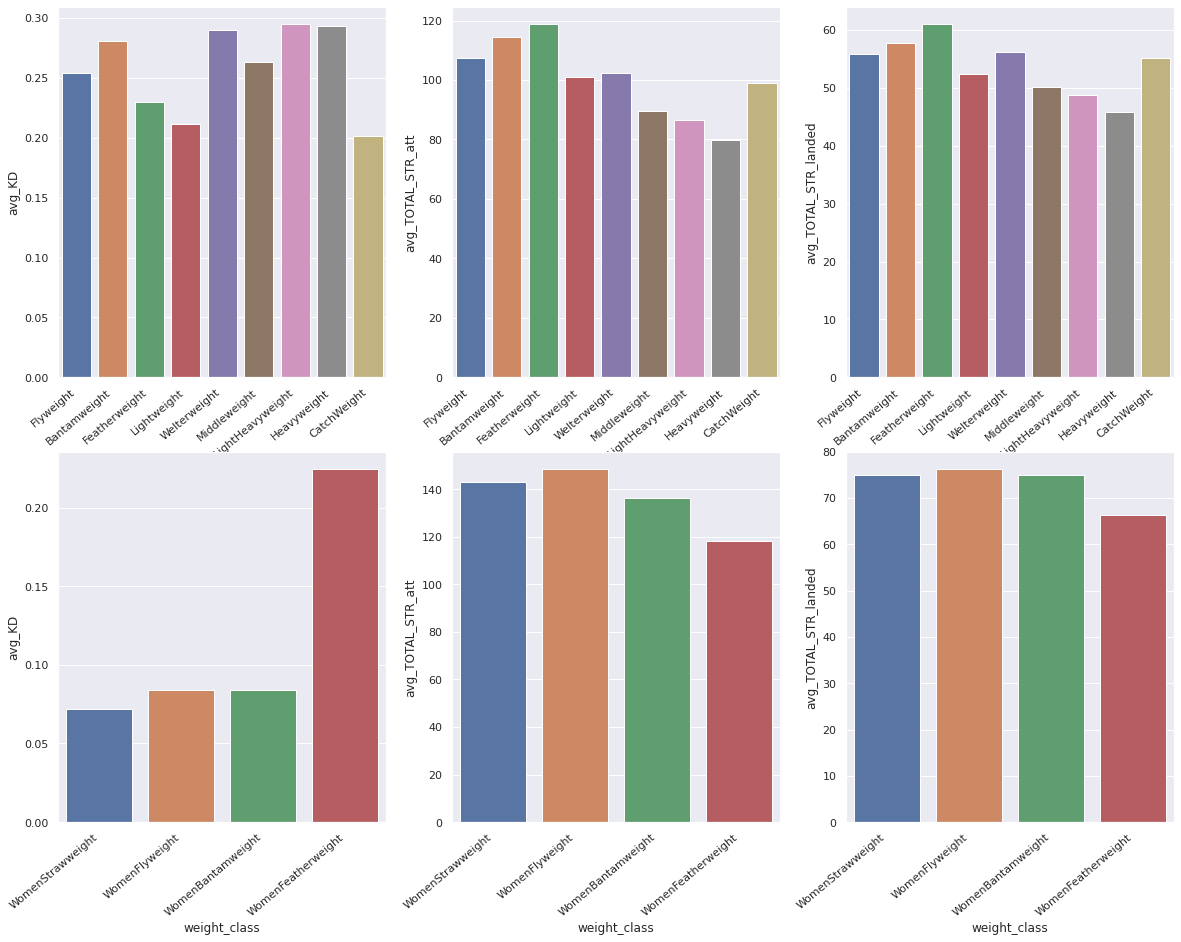

In [69]:
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, ax= plt.subplots(2, 3)

men_wc = by_wc[~by_wc.weight_class.str.contains('Women')]
women_wc = by_wc[by_wc.weight_class.str.contains('Women')]
ax1 = sns.barplot(data=men_wc, x = 'weight_class',y='avg_KD',order = ['Flyweight','Bantamweight','Featherweight','Lightweight',
                                                    'Welterweight','Middleweight','LightHeavyweight','Heavyweight','CatchWeight'], ax=ax[0,0])
ax2 = sns.barplot(data=men_wc, x = 'weight_class',y='avg_TOTAL_STR_att',order = ['Flyweight','Bantamweight','Featherweight','Lightweight',
                                                    'Welterweight','Middleweight','LightHeavyweight','Heavyweight','CatchWeight'],ax=ax[0,1])
ax3 = sns.barplot(data=men_wc, x = 'weight_class',y='avg_TOTAL_STR_landed',order = ['Flyweight','Bantamweight','Featherweight','Lightweight',
                                                    'Welterweight','Middleweight','LightHeavyweight','Heavyweight','CatchWeight'],ax=ax[0,2])
ax4 = sns.barplot(data=women_wc, x = 'weight_class',y='avg_KD',order = ['WomenStrawweight','WomenFlyweight','WomenBantamweight',
                                                                                      'WomenFeatherweight'],ax=ax[1,0])
ax5 = sns.barplot(data=women_wc, x = 'weight_class',y='avg_TOTAL_STR_att',order = ['WomenStrawweight','WomenFlyweight','WomenBantamweight',
                                                                                      'WomenFeatherweight'],ax=ax[1,1])
ax6 = sns.barplot(data=women_wc, x = 'weight_class',y='avg_TOTAL_STR_landed',order = ['WomenStrawweight','WomenFlyweight','WomenBantamweight',
                                                                                      'WomenFeatherweight'],ax=ax[1,2])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=40, ha="right")


## Striking by Weight Class Results
I only want to look at the major striking statistic categories of average knockdowns, average total strikes attempted and average total strikes landed by weight class. The graphs illustrate our intuition that the heavier weight classes have a higher average knockdown stat, due to the power of the heavier fighters. However, it's interesting to see that the two lightest weight classes also have a relatively high average knockdown stat, which may be explained due to having a "weaker" chin or not being able to take a punch as well due to being a lighter fighter. The next graph clearly shows that the lighter weight classes attempt more strikes on average, which is clear when watching the fights. Lower weight class fighters are more exciting in that they throw a lot of combinations and attempt many strikes and usually have better cardio, whereas the heavier fighters don't attempt as much but have a lot of power. We see that the average total strikes landed follows a similar pattern.

The most interesting visual for the women's division is the average knockdown chart, where the heaviest weight class "Featherweight" has over double the average number of takdowns. This may be explained due to the fact that not many women compete in that weight class as it is a faily heavy weight class for women, and arguably the greatest woman fighter of all time Amanda Nunes primarily fights in that weight class. 

## Clustering Analysis
Now, I want to be able to try to cluster different type of fighting styles based on important fighting statistics such as average knockdown, significant strikes attempted, take downs attempted, submissions attempted, total strikes attempted, control time, and clinch attempts. All of these stats take into account almost all aspects of fighting including the stand up game and the grappling/wrestling game. After clustering fighters based on these dimensions, we'd be able to classify new fighters their fighting style based on their statistics. This may help coaches/fighters/analysts to game plan better against their opponent if they know statistially what tendencies/fighting style they like to implement and have counter measures for that.


#### Methodology
1. Aggregate data by fighters most recent fight and their most recent fighting statistics and filter columns to include only those mnetioned above. 
2. Scale data which is necessary for clustering analysis that use distance-based metrics to calculate similarities. If the variables have different scales or magnitudes, variables with larger scales can dominate the clustering process, leading to biased results. ariables with larger scales can have a higher influence on the clustering results. Scaling the data helps to mitigate this sensitivity and ensures that each variable has a fair impact on the clustering process.
3. Specify KMeans Algorithm parameters
4. Loop through different ranges of "k" and fit KMeans model to scaled dataset, and appends the inertia which is the sum of squared distances of samples to their closest cluster center to a list.
5. Visualize the "sse" list and examine for the elbow point which is identified as the value of K where the SSE decrease begins to flatten out and the rate of improvement diminishes significantly.
6. Choose the value of K from the elbow method plot and cluster our dataset and analyze results

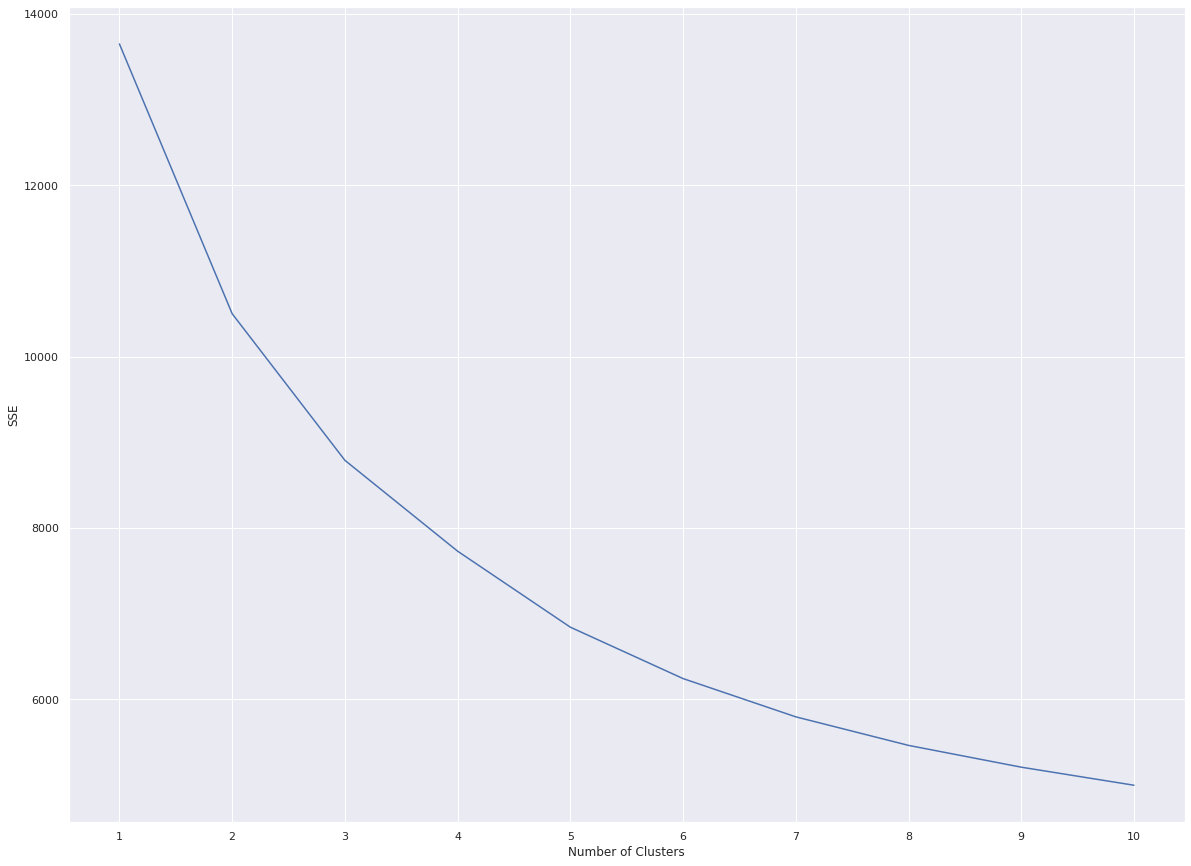

In [70]:
most_recent = combined_data.groupby('fighter').date.max().reset_index().merge(combined_data, on =['fighter','date'],how='inner')
most_recent = most_recent[~most_recent.fighter.duplicated()]
most_recent = most_recent[['fighter','date','avg_KD','avg_SIG_STR_att','avg_TD_att','avg_SUB_ATT','avg_TOTAL_STR_att','avg_CTRL_time(seconds)',
             'avg_CLINCH_att']].dropna()
scaled_df = StandardScaler().fit_transform(most_recent.drop(['fighter','date'],axis=1)) ## Scale data for clustering use
sse = []
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs) ## Use Scikit-learn Kmeans algorithm
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results and elbow method to choose number of clusters
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [71]:
## Fit Kmeans Model with k number of clusters chose from heuristic approach above
kmeans = KMeans(n_clusters=4, init = 'random',n_init=10,random_state=1)
kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=4, random_state=1)

In [72]:
most_recent['cluster'] = kmeans.labels_
fighter_stats = most_recent.merge(total,left_on='fighter',right_index=True)

fighter_stats[fighter_stats.cluster==0].describe()

,avg_KD,avg_SIG_STR_att,avg_TD_att,avg_SUB_ATT,avg_TOTAL_STR_att,avg_CTRL_time(seconds),avg_CLINCH_att,cluster,Wins,Losses,draw,total_count,win_pct
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.0,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.771068,76.428938,1.506610,0.241683,91.290149,92.443008,6.108202,0.0,4.405303,3.166667,0.132576,7.704545,0.541072
std,0.348862,37.227119,1.501110,0.443676,40.574016,83.010370,5.313674,0.0,3.705731,2.363109,0.350772,5.472696,0.232809
min,0.375000,8.000000,0.000000,0.000000,11.320312,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.500000,48.187500,0.287476,0.000000,64.843750,29.271973,2.546875,0.0,2.000000,2.000000,0.000000,4.000000,0.400000
50%,0.636402,71.260254,1.000000,0.003906,88.968750,66.392578,4.846680,0.0,3.000000,3.000000,0.000000,6.000000,0.545455
75%,1.000000,99.272400,2.250000,0.302274,116.681213,125.986141,7.984375,0.0,6.000000,4.000000,0.000000,10.000000,0.666667
max,2.376732,209.000000,8.000000,2.875000,254.500000,479.000000,39.000000,0.0,21.000000,14.000000,2.000000,31.000000,1.000000


In [73]:
fighter_stats[fighter_stats.cluster==1].describe()

,avg_KD,avg_SIG_STR_att,avg_TD_att,avg_SUB_ATT,avg_TOTAL_STR_att,avg_CTRL_time(seconds),avg_CLINCH_att,cluster,Wins,Losses,draw,total_count,win_pct
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.0,406.000000,406.000000,406.000000,406.000000,406.000000
mean,0.048841,70.806639,6.511057,0.690650,106.213007,289.738194,7.317292,1.0,3.743842,3.096059,0.110837,6.950739,0.457388
std,0.124223,32.136483,3.263976,0.826670,39.958445,128.247187,5.798733,0.0,4.007203,2.175766,0.365190,5.653583,0.257657
min,0.000000,4.000000,0.000000,0.000000,16.000000,9.000000,0.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,47.125000,4.295471,0.017563,76.000000,204.625000,2.750000,1.0,1.000000,2.000000,0.000000,3.000000,0.333333
50%,0.000000,67.250000,5.937500,0.500000,102.000000,267.390625,5.687500,1.0,2.000000,2.000000,0.000000,5.000000,0.500000
75%,0.007812,91.582031,8.250000,1.000000,128.625168,364.187500,10.463644,1.0,5.000000,4.000000,0.000000,8.000000,0.636364
max,1.000000,195.410731,22.000000,5.000000,255.389159,780.000000,25.000000,1.0,21.000000,17.000000,3.000000,35.000000,1.000000


In [74]:
fighter_stats[fighter_stats.cluster==2].describe()

,avg_KD,avg_SIG_STR_att,avg_TD_att,avg_SUB_ATT,avg_TOTAL_STR_att,avg_CTRL_time(seconds),avg_CLINCH_att,cluster,Wins,Losses,draw,total_count,win_pct
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.0,866.000000,866.000000,866.000000,866.000000,866.000000
mean,0.070907,42.559079,1.347560,0.323804,54.461952,59.969331,3.797542,2.0,2.785219,3.482679,0.121247,6.389145,0.309223
std,0.125151,27.380237,1.345718,0.538868,32.395032,62.430244,3.723034,0.0,3.660451,2.327081,0.350506,5.744649,0.250160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,19.003052,0.125000,0.000000,28.448110,8.882812,1.000000,2.0,0.000000,2.000000,0.000000,2.000000,0.000000
50%,0.000000,40.508789,1.000000,0.009936,53.827736,40.687500,2.750000,2.0,1.000000,3.000000,0.000000,4.000000,0.333333
75%,0.091309,62.364441,2.013916,0.500000,76.982422,94.000000,5.359326,2.0,4.000000,4.000000,0.000000,8.000000,0.500000
max,0.511719,124.062500,6.218750,4.000000,211.210938,428.000000,26.031250,2.0,24.000000,17.000000,2.000000,41.000000,1.000000


In [75]:
fighter_stats[fighter_stats.cluster==3].describe()

,avg_KD,avg_SIG_STR_att,avg_TD_att,avg_SUB_ATT,avg_TOTAL_STR_att,avg_CTRL_time(seconds),avg_CLINCH_att,cluster,Wins,Losses,draw,total_count,win_pct
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.0,414.000000,414.000000,414.000000,414.000000,414.000000
mean,0.096065,147.874140,2.468160,0.170778,172.146951,108.740331,11.600063,3.0,4.335749,3.666667,0.147343,8.149758,0.446984
std,0.183935,52.165658,2.070872,0.346886,51.903977,87.465833,8.613608,0.0,4.250717,2.410630,0.393691,6.072746,0.247167
min,0.000000,53.000000,0.000000,0.000000,65.000000,0.000000,0.000000,3.0,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,112.187500,0.945580,0.000000,138.562500,38.523438,5.226562,3.0,1.000000,2.000000,0.000000,4.000000,0.285714
50%,0.000000,138.781250,2.000000,0.000521,161.536089,90.408447,9.500000,3.0,3.000000,3.000000,0.000000,6.000000,0.500000
75%,0.125000,174.192871,3.617188,0.187500,195.640625,163.277832,15.814453,3.0,7.000000,5.000000,0.000000,11.000000,0.625000
max,1.180664,456.000000,10.000000,3.085312,524.000000,460.388428,46.250000,3.0,23.000000,15.000000,2.000000,39.000000,1.000000


In [76]:
fighter_stats[fighter_stats.cluster==0].sort_values(by='Wins',ascending=False).head(5)

,fighter,date,avg_KD,avg_SIG_STR_att,avg_TD_att,avg_SUB_ATT,avg_TOTAL_STR_att,avg_CTRL_time(seconds),avg_CLINCH_att,cluster,Wins,Losses,draw,total_count,win_pct
372,Charles Oliveira,2022-10-22,0.773441,67.239534,2.495629,2.015901,80.733793,162.621334,10.375779,0,21.0,9.0,1.0,31.0,0.677419
668,Dustin Poirier,2022-11-12,0.633156,99.217367,1.220718,0.298865,110.071817,94.690692,5.311804,0,21.0,6.0,1.0,28.0,0.750000
1556,Matt Brown,2022-03-26,0.547032,47.887352,1.733897,0.018688,54.121929,121.713215,7.159499,0,16.0,13.0,0.0,29.0,0.551724
1983,Ryan Bader,2016-11-19,0.502232,45.649117,2.626293,0.037117,50.917313,44.856064,1.034428,0,15.0,5.0,0.0,20.0,0.750000
2186,Thiago Santos,2022-08-06,0.595050,119.765342,0.432260,0.001953,135.356688,15.812125,3.529763,0,14.0,10.0,0.0,24.0,0.583333


In [77]:
fighter_stats.groupby('cluster').mean()

,avg_KD,avg_SIG_STR_att,avg_TD_att,avg_SUB_ATT,avg_TOTAL_STR_att,avg_CTRL_time(seconds),avg_CLINCH_att,Wins,Losses,draw,total_count,win_pct
cluster,,,,,,,,,,,,
0,0.771068,76.428938,1.506610,0.241683,91.290149,92.443008,6.108202,4.405303,3.166667,0.132576,7.704545,0.541072
1,0.048841,70.806639,6.511057,0.690650,106.213007,289.738194,7.317292,3.743842,3.096059,0.110837,6.950739,0.457388
2,0.070907,42.559079,1.347560,0.323804,54.461952,59.969331,3.797542,2.785219,3.482679,0.121247,6.389145,0.309223
3,0.096065,147.874140,2.468160,0.170778,172.146951,108.740331,11.600063,4.335749,3.666667,0.147343,8.149758,0.446984


In [78]:
fighter_stats[fighter_stats.total_count >=10].sort_values(by='win_pct',ascending=False).head(15)[['fighter','cluster','Wins','win_pct']]

,fighter,cluster,Wins,win_pct
1334,Khabib Nurmagomedov,1,13.0,1.000000
922,Islam Makhachev,0,13.0,0.928571
86,Alexander Volkanovski,3,12.0,0.923077
1165,Jon Jones,3,21.0,0.913043
811,Georges St-Pierre,1,20.0,0.909091
188,Arnold Allen,2,10.0,0.909091
637,Don Frye,2,9.0,0.900000
113,Amanda Nunes,1,15.0,0.882353
1282,Kamaru Usman,3,15.0,0.882353
925,Israel Adesanya,3,13.0,0.866667


After analyzing each cluster group and their statistics, we see that there are 4 distinct fighting styles. 
- Cluster 0 differs from the others in that it has a much higher average knockdown rate than the other groups, representing our knckout-power fighters that can rock their opponents. ## cluster 0 = knockout power
- Cluster 1 displays our grappling-heavy fighters, with a significantly higher average takdown and submission attempts, and much more control time than the other groups. These fighters love to take the fight to the ground and dominate that way.
- Cluster 2 represents our jack of all trades, master of none fighters. We may label these as true mixed martial artists in that they employ all fighting techniques of striking, grappling and wrestling but don't significantly out perform any of the other groups in any category.
- Cluster 3 are our volume fighters, with a significantly higher average number of total and significant strikes attemptd than the other groups. These are our strikes who have a high output of strikes.

Let's look at some of the fighters in these clusters to see if we are correct in our analysis. We see that for cluster 0, our winningest fighters are Charles Olviera, Dustin Porier and Matt Brown. Charles is surprising in that he's actually known for his expertise in grappling, but we can see through the data that he also has knockdown power which is evident in his most recent wins, with knockdowns over Michael Chandler to claim the LightWeight championship belt and over Justin Gaethje to retain his belt. Dustin Porier is no suprise as he is known for this supreme boxing skills with a notable knockdown over Connor Mcgregor. Matt Brown is actually holds the UFC record with most knockouts in the UFC. So far, we can see that our cluster analysis is fairly accurate when looking at what fighters make up what groups.

When looking at the clusters by average win percentage, 

## Let's move on to our main goal of predicting outcomes of UFC Fights
### Method
- Binary Classification Model

#### Feature Engineering:
Our dataset already has fighting statistic features that may prove to be useful in our classifier model. We calculate a couple of other features that may prove to be useful such as: 
- days since last fight: want to account for long lay offs which may contribute to ring rust or short lay offs which may indicate being more prone to injury or not having enough recovery since the last fight
- Instead of keeping individual columns for each fighter per row, we can significantly reduce our dimensionality by subtracting the blue fighters statistics from the red fighters statistics. Therefore, a positive number indicates that the blue fighter had a higher stat for that feature while a negative number indicates the red fighter had a higher stat fo rthat statistic. This helps provide the same information of which fighter had the advantage in that category while reducing our feature set by almost half.

In [79]:
data['label'] = data.Winner.map({'Blue':1,'Red':0})


In [81]:
days = pd.DataFrame(columns=['date','fighter','days_since_last_fight'])
for i in total[total.total_count>1].index:
    df = combined_data[combined_data.fighter==i].sort_values(by='date')[['date','fighter']]
    df['days_since_last_fight'] = combined_data[combined_data.fighter==i].sort_values(by='date').date.diff()
    days = days.append(df)
days.head()

,date,fighter,days_since_last_fight
1840,2019-08-31,Alatengheili,NaT
1668,2019-12-21,Alatengheili,112 days
558,2022-04-16,Alatengheili,847 days
1050,2021-04-24,Aoriqileng,NaT
541,2022-04-23,Aoriqileng,364 days


In [82]:
X = data.merge(days,left_on=['B_fighter','date'],right_on=['fighter','date'],how='left').drop('fighter',axis=1).rename(
    {'days_since_last_fight':'B_days_since_last_fight'},axis=1)
X=X.merge(days,left_on=['R_fighter','date'],right_on=['fighter','date'],how='left').drop('fighter',axis=1).rename(
    {'days_since_last_fight':'R_days_since_last_fight'},axis=1)
X = X.dropna()
X.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,label,B_days_since_last_fight,R_days_since_last_fight
0,Kron Gracie,Charles Jourdain,Gary Copeland,2023-05-06,"Newark, New Jersey, USA",Blue,False,Featherweight,0.070312,0.009766,0.499258,0.487656,0.250000,0.593008,0.148438,0.781250,0.00000,0.125,174.021484,85.443359,145.414062,68.640625,204.253906,114.007812,171.042969,90.853516,1.390625,0.500000,6.210938,3.292969,136.001953,53.580078,108.892578,39.660156,32.011719,27.068359,17.609375,11.363281,6.007812,4.794922,18.912109,17.617188,136.171875,54.664062,125.080078,54.462891,34.115234,27.853516,16.814453,12.207031,3.734375,2.925781,3.519531,1.970703,59.759766,247.783203,801.531250,27,0,0,1,2,4,6,0,0,0,1,2,1,0,Switch,175.26,175.26,145.0,0.000000,0.000000,0.315000,0.370000,0.250000,0.000000,0.500000,0.000000,0.000000,0.000000,105.000000,44.000000,151.000000,69.500000,118.000000,56.000000,155.000000,73.500000,2.000000,0.500000,0.000000,0.000000,91.500000,37.000000,114.000000,43.500000,4.000000,2.000000,29.000000,20.000000,9.500000,5.000000,8.000000,6.000000,96.000000,38.000000,133.000000,57.000000,8.000000,5.500000,17.000000,12.000000,1.000000,0.500000,1.000000,0.500000,39.000000,18.000000,513.000000,4,0,1,0,1,1,1,0,0,0,0,0,1,0,Southpaw,175.26,177.80,145.0,27.0,34.0,1.0,245 days,1302 days
1,Belal Muhammad,Gilbert Burns,Keith Peterson,2023-05-06,"Newark, New Jersey, USA",Red,False,Welterweight,0.008484,0.1880

In [83]:
# Positive means the "B" fighter has a higher attribute than the "R" fighter
# Negative means vice versa
X['B_days_since_last_fight'] = X['B_days_since_last_fight'].apply(lambda x: x.days)
X['R_days_since_last_fight'] = X['R_days_since_last_fight'].apply(lambda x: x.days)
X['avg_KD_diff'] = X['B_avg_KD'] - X['R_avg_KD']
X['avg_opp_KD_diff'] = X['B_avg_opp_KD'] - X['R_avg_opp_KD']
X['avg_sig_str_pct_diff'] = X['B_avg_SIG_STR_pct'] - X['R_avg_SIG_STR_pct']
X['avg_opp_sig_str_pct_diff'] = X['B_avg_opp_SIG_STR_pct'] - X['R_avg_opp_SIG_STR_pct']
X['avg_TD_pct_diff'] = X['B_avg_TD_pct'] - X['R_avg_TD_pct']
X['avg_opp_TD_pct_diff'] = X['B_avg_opp_TD_pct'] - X['R_avg_opp_TD_pct']
X['avg_sub_att_pct_diff'] = X['B_avg_SUB_ATT'] - X['R_avg_SUB_ATT']
X['avg_opp_sub_att_pct_diff'] = X['B_avg_opp_SUB_ATT'] - X['R_avg_opp_SUB_ATT']
X['avg_rev_diff'] = X['B_avg_REV'] - X['R_avg_REV']
X['avg_opp_rev_diff'] = X['B_avg_opp_REV'] - X['R_avg_opp_REV']
X['avg_sig_str_att_diff'] = X['B_avg_SIG_STR_att'] - X['R_avg_SIG_STR_att']
X['avg_sig_str_landed_diff'] = X['B_avg_SIG_STR_landed'] - X['R_avg_SIG_STR_landed']
X['avg_opp_sig_str_att_diff'] = X['B_avg_opp_SIG_STR_att'] - X['R_avg_opp_SIG_STR_att']
X['avg_opp_sig_str_landed_diff'] = X['B_avg_opp_SIG_STR_landed'] - X['R_avg_opp_SIG_STR_landed']
X['avg_total_str_att_diff'] = X['B_avg_TOTAL_STR_att'] - X['R_avg_TOTAL_STR_att']
X['avg_total_str_landed_diff'] = X['B_avg_TOTAL_STR_landed'] - X['R_avg_TOTAL_STR_landed']
X['avg_opp_total_str_att_diff'] = X['B_avg_opp_TOTAL_STR_att'] - X['R_avg_opp_TOTAL_STR_att']
X['avg_opp_total_str_landed_diff'] = X['B_avg_opp_TOTAL_STR_landed'] - X['R_avg_opp_TOTAL_STR_landed']
X['avg_TD_att_diff'] = X['B_avg_TD_att'] - X['R_avg_TD_att']
X['avg_TD_landed_diff'] = X['B_avg_TD_landed'] - X['R_avg_TD_landed']
X['avg_opp_TD_att_diff'] = X['B_avg_opp_TD_att'] - X['R_avg_opp_TD_att']
X['avg_opp_TD_landed_diff'] = X['B_avg_opp_TD_landed'] - X['R_avg_opp_TD_landed']
X['avg_head_att_diff'] = X['B_avg_HEAD_att'] - X['R_avg_HEAD_att']
X['avg_head_landed_diff'] =  X['B_avg_HEAD_landed'] - X['R_avg_HEAD_landed']
X['avg_opp_head_att_diff'] =  X['B_avg_opp_HEAD_att'] - X['R_avg_opp_HEAD_att']
X['avg_opp_head_landed_diff'] =  X['B_avg_opp_HEAD_landed'] - X['R_avg_opp_HEAD_landed']
X['avg_body_att_diff'] = X['B_avg_BODY_att'] - X['R_avg_BODY_att']
X['avg_body_landed_diff'] =  X['B_avg_BODY_landed'] - X['R_avg_BODY_landed']
X['avg_opp_body_att_diff'] =  X['B_avg_opp_BODY_att'] - X['R_avg_opp_BODY_att']
X['avg_opp_body_landed_diff'] =  X['B_avg_opp_BODY_landed'] - X['R_avg_opp_BODY_landed']
X['avg_leg_att_diff'] = X['B_avg_LEG_att'] - X['R_avg_LEG_att']
X['avg_leg_landed_diff'] =  X['B_avg_LEG_landed'] - X['R_avg_LEG_landed']
X['avg_opp_leg_att_diff'] =  X['B_avg_opp_LEG_att'] - X['R_avg_opp_LEG_att']
X['avg_opp_leg_landed_diff'] =  X['B_avg_opp_LEG_landed'] - X['R_avg_opp_LEG_landed']
X['avg_distance_att_diff'] =X['B_avg_DISTANCE_att'] - X['R_avg_DISTANCE_att']
X['avg_distance_landed_diff'] =X['B_avg_DISTANCE_landed'] - X['R_avg_DISTANCE_landed']
X['avg_opp_distance_att_diff'] =X['B_avg_opp_DISTANCE_att'] - X['R_avg_opp_DISTANCE_att']
X['avg_opp_distance_landed_diff'] =X['B_avg_opp_DISTANCE_landed'] - X['R_avg_opp_DISTANCE_landed']
X['avg_clinch_att_diff'] = X['B_avg_CLINCH_att'] - X['R_avg_CLINCH_att']
X['avg_clinch_landed_diff'] = X['B_avg_CLINCH_landed'] - X['R_avg_CLINCH_landed']
X['avg_opp_clinch_att_diff'] = X['B_avg_opp_CLINCH_att'] - X['R_avg_opp_CLINCH_att']
X['avg_opp_clinch_landed_diff'] = X['B_avg_opp_CLINCH_landed'] - X['R_avg_opp_CLINCH_landed']
X['avg_ground_att_diff'] = X['B_avg_GROUND_att'] = X['R_avg_GROUND_att']
X['avg_ground_landed_diff'] = X['B_avg_GROUND_landed'] = X['R_avg_GROUND_landed']
X['avg_opp_ground_att_diff'] = X['B_avg_opp_GROUND_att'] = X['R_avg_opp_GROUND_att']
X['avg_opp_ground_landed_diff'] = X['B_avg_opp_GROUND_landed'] = X['R_avg_opp_GROUND_landed']
X['avg_ctrl_time_diff'] = X['B_avg_CTRL_time(seconds)'] = X['R_avg_CTRL_time(seconds)']
X['height_diff'] = X['B_Height_cms'] = X['R_Height_cms']
X['reach_diff'] = X['B_Reach_cms'] - X['R_Reach_cms']
X['age_diff'] = X['B_age'] - X['R_age']
X['total_time_fought_diff'] = X['B_total_time_fought(seconds)'] - X['R_total_time_fought(seconds)']
X['total_rounds_fought_diff']= X['B_total_rounds_fought'] = X['R_total_rounds_fought']
X['wins_diff'] = X['B_wins'] - X['R_wins']
X['loss_diff'] = X['B_losses'] - X['R_losses']
X['draw_diff'] = X['B_draw'] - X['R_draw']
X['total_title_bouts_diff'] = X['B_total_title_bouts'] - X['R_total_title_bouts']
X['curr_win_streak_diff'] = X['B_current_win_streak'] - X['R_current_win_streak']
X['curr_lose_streak_diff'] = X['B_current_lose_streak'] - X['R_current_lose_streak']
X['longest_win_streak_diff'] = X['B_longest_win_streak'] - X['R_longest_win_streak']
X['win_by_majority_diff'] = X['B_win_by_Decision_Majority'] - X['R_win_by_Decision_Majority']
X['win_by_dec_unanimous_diff'] = X['B_win_by_Decision_Unanimous'] - X['R_win_by_Decision_Unanimous']
X['win_by_tko_ko_diff'] = X['B_win_by_KO/TKO'] - X['R_win_by_KO/TKO']
X['win_by_sub_diff'] = X['B_win_by_Submission'] - X['R_win_by_Submission']
X['win_by_doctor_stop_diff'] = X['B_win_by_TKO_Doctor_Stoppage'] - X['R_win_by_TKO_Doctor_Stoppage']
X['win_by_split_decision_diff'] = X['B_win_by_Decision_Split'] - X['R_win_by_Decision_Split']
X['days_since_last_fight_diff'] = X['B_days_since_last_fight'] - X['R_days_since_last_fight']
X = pd.concat([X,pd.get_dummies(X[['B_Stance','R_Stance']])],axis=1)
X['title_bout'] = X.title_bout.map({False:0,True:1})
X= X.drop(['B_days_since_last_fight','Referee','location', 'Winner','weight_class','B_avg_KD', 'B_avg_opp_KD','B_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_pct', 
           'B_avg_TD_pct','B_avg_opp_TD_pct', 'B_avg_SUB_ATT', 'R_total_rounds_fought','R_wins','B_wins','B_Stance','R_Stance',
           'B_avg_opp_SUB_ATT', 'B_avg_REV','B_avg_opp_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed','B_avg_opp_SIG_STR_att', 
           'B_avg_opp_SIG_STR_landed', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed','B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed', 
           'B_avg_TD_att','B_avg_TD_landed', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed','B_avg_HEAD_att', 'B_avg_HEAD_landed',
           'B_avg_opp_HEAD_att','B_avg_opp_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed','B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed',
           'B_avg_LEG_att','B_avg_LEG_landed','B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 
           'B_avg_opp_DISTANCE_att','B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed','B_avg_opp_CLINCH_att', 
           'B_avg_opp_CLINCH_landed', 'B_avg_GROUND_att','B_avg_GROUND_landed', 'B_avg_opp_GROUND_att','B_avg_opp_GROUND_landed', 
           'B_avg_CTRL_time(seconds)', 'B_avg_opp_CTRL_time(seconds)','B_Height_cms','B_Reach_cms', 'B_Weight_lbs','R_avg_KD', 'R_avg_opp_KD',
       'R_avg_SIG_STR_pct', 'R_avg_opp_SIG_STR_pct', 'R_avg_TD_pct','R_avg_opp_TD_pct', 'R_avg_SUB_ATT', 'R_avg_opp_SUB_ATT', 'R_avg_REV',
       'R_avg_opp_REV', 'R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed', 'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed','R_avg_TOTAL_STR_att', 
        'R_avg_TOTAL_STR_landed','R_avg_opp_TOTAL_STR_att', 'R_avg_opp_TOTAL_STR_landed', 'R_avg_TD_att','R_avg_TD_landed', 'R_avg_opp_TD_att',
           'R_avg_opp_TD_landed','R_avg_HEAD_att', 'R_avg_HEAD_landed', 'R_avg_opp_HEAD_att','R_avg_opp_HEAD_landed', 'R_avg_BODY_att', 
           'R_avg_BODY_landed','R_avg_opp_BODY_att', 'R_avg_opp_BODY_landed', 'R_avg_LEG_att','R_avg_LEG_landed', 'R_avg_opp_LEG_att', 
           'R_avg_opp_LEG_landed','R_avg_DISTANCE_att', 'R_avg_DISTANCE_landed', 'R_avg_opp_DISTANCE_att','R_avg_opp_DISTANCE_landed', 
           'R_avg_CLINCH_att', 'R_avg_CLINCH_landed','R_avg_opp_CLINCH_att', 'R_avg_opp_CLINCH_landed', 'R_avg_GROUND_att','R_avg_GROUND_landed', 
           'R_avg_opp_GROUND_att','B_age','R_age', 'B_total_time_fought(seconds)', 'R_total_time_fought(seconds)', 'B_total_rounds_fought',
       'R_avg_opp_GROUND_landed','R_avg_CTRL_time(seconds)', 'R_avg_opp_CTRL_time(seconds)','R_Height_cms','R_Reach_cms', 'R_Weight_lbs',
          'B_total_title_bouts','R_total_title_bouts','B_losses','R_losses','B_draw','R_draw','B_current_win_streak',
          'R_current_win_streak','B_current_lose_streak','R_current_lose_streak','B_longest_win_streak','R_longest_win_streak',
          'B_win_by_Decision_Majority','R_win_by_Decision_Majority','B_win_by_Decision_Unanimous','R_win_by_Decision_Unanimous',
          'B_win_by_KO/TKO','R_win_by_KO/TKO','B_win_by_Submission','R_win_by_Submission','B_win_by_TKO_Doctor_Stoppage',
          'R_win_by_TKO_Doctor_Stoppage','B_win_by_Decision_Split','R_win_by_Decision_Split','R_days_since_last_fight'],axis=1)

In [84]:
X.columns

Index(['R_fighter', 'B_fighter', 'date', 'title_bout', 'label', 'avg_KD_diff',
       'avg_opp_KD_diff', 'avg_sig_str_pct_diff', 'avg_opp_sig_str_pct_diff',
       'avg_TD_pct_diff', 'avg_opp_TD_pct_diff', 'avg_sub_att_pct_diff',
       'avg_opp_sub_att_pct_diff', 'avg_rev_diff', 'avg_opp_rev_diff',
       'avg_sig_str_att_diff', 'avg_sig_str_landed_diff',
       'avg_opp_sig_str_att_diff', 'avg_opp_sig_str_landed_diff',
       'avg_total_str_att_diff', 'avg_total_str_landed_diff',
       'avg_opp_total_str_att_diff', 'avg_opp_total_str_landed_diff',
       'avg_TD_att_diff', 'avg_TD_landed_diff', 'avg_opp_TD_att_diff',
       'avg_opp_TD_landed_diff', 'avg_head_att_diff', 'avg_head_landed_diff',
       'avg_opp_head_att_diff', 'avg_opp_head_landed_diff',
       'avg_body_att_diff', 'avg_body_landed_diff', 'avg_opp_body_att_diff',
       'avg_opp_body_landed_diff', 'avg_leg_att_diff', 'avg_leg_landed_diff',
       'avg_opp_leg_att_diff', 'avg_opp_leg_landed_diff',
       'avg_distance_

In [85]:
X.head()

,R_fighter,B_fighter,date,title_bout,label,avg_KD_diff,avg_opp_KD_diff,avg_sig_str_pct_diff,avg_opp_sig_str_pct_diff,avg_TD_pct_diff,avg_opp_TD_pct_diff,avg_sub_att_pct_diff,avg_opp_sub_att_pct_diff,avg_rev_diff,avg_opp_rev_diff,avg_sig_str_att_diff,avg_sig_str_landed_diff,avg_opp_sig_str_att_diff,avg_opp_sig_str_landed_diff,avg_total_str_att_diff,avg_total_str_landed_diff,avg_opp_total_str_att_diff,avg_opp_total_str_landed_diff,avg_TD_att_diff,avg_TD_landed_diff,avg_opp_TD_att_diff,avg_opp_TD_landed_diff,avg_head_att_diff,avg_head_landed_diff,avg_opp_head_att_diff,avg_opp_head_landed_diff,avg_body_att_diff,avg_body_landed_diff,avg_opp_body_att_diff,avg_opp_body_landed_diff,avg_leg_att_diff,avg_leg_landed_diff,avg_opp_leg_att_diff,avg_opp_leg_landed_diff,avg_distance_att_diff,avg_distance_landed_diff,avg_opp_distance_att_diff,avg_opp_distance_landed_diff,avg_clinch_att_diff,avg_clinch_landed_diff,avg_opp_clinch_att_diff,avg_opp_clinch_landed_diff,avg_ground_att_diff,avg_ground_landed_diff,avg_opp_ground_att_diff,avg_opp_ground_landed_diff,avg_ctrl_time_diff,height_diff,reach_diff,age_diff,total_time_fought_diff,total_rounds_fought_diff,wins_diff,loss_diff,draw_diff,total_title_bouts_diff,curr_win_streak_diff,curr_lose_streak_diff,longest_win_streak_diff,win_by_majority_diff,win_by_dec_unanimous_diff,win_by_tko_ko_diff,win_by_sub_diff,win_by_doctor_stop_diff,win_by_split_decision_diff,days_since_last_fight_diff,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Kron Gracie,Charles Jourdain,2023-05-06,0,1.0,0.070312,0.009766,0.184258,0.117656,0.000000,0.593008,-0.351562,0.781250,0.000000,0.125000,69.021484,41.443359,-5.585938,-0.859375,86.253906,58.007812,16.042969,17.353516,-0.609375,0.000000,6.210938,3.292969,44.501953,16.580078,-5.107422,-3.839844,28.011719,25.068359,-11.390625,-8.636719,-3.492188,-0.205078,10.912109,11.617188,40.171875,16.664062,-7.919922,-2.537109,26.115234,22.353516,-0.185547,0.207031,1.000000,0.500000,1.000000,0.500000,39.000000,175.26,-2.54,-7.0,288.531250,4,3,5,0,0,-1,1,1,0,1,2,0,0,0,-1057,0,0,0,1,0,0,1,0
1,Belal Muhammad,Gilbert Burns,2023-05-06,0,0.0,0.008484,0.185974,0.158112,-0.066431,0.391374,0.085900,0.141140,0.000122,0.000000,-0.000183,-85.328451,-26.343374,-33.706436,-17.843599,-108.234625,-37.906845,-17.613163,-2.013304,0.601778,0.312986,-3.562620,0.199326,-81.985613,-25.204546,-32.638977,-16.931595,-5.942503,-2.804905,1.294245,1.930494,2.599665,1.666077,-2.361704,-2.842499,-80.395538,-24.361115,-37.141836,-20.089596,-1.885326,-0.413998,0.806040,0.807043,10.825241,7.171936,0.760666,0.630432,207.974335,180.34,-2.54,2.0,-141.195478,49,2,1,0,1,3,-1,2,0,-2,1,4,0,-1,-168,0,1,0,0,0,1,0,0
3,Jessica Andrade,Yan Xiaonan,2023-05-06,0,1.0,-0.016603,-0.005920,0.049421,0.033811,-0.097944,0.037199,-0.125040,0.513169,-0.000488,1.000000,-17.262488,-7.225485,-0.937502,2.146487,12.964683,18.610883,114.605788,103.426196,0.186190,0.372575,1.118266,0.803694,-22.792688,-13.136327,-5.105978,-0.856815,-0.613415,1.522163,4.429052,4.868899,6.143615,4.388679,-0.260576,-1.865597,-19.412555,-9.777527,-11.102686,-5.680035,-2.738935,-1.524962,2.483355,1.786056,0.392248,0.383933,0.579890,0.572815,27.264597,154.94,2.54,2.0,651.880525,49,-8,-6,0,-4,6,-1,2,1,0,-5,-3,0,-1,140,0,1,0,0,0,1,0,0
4,Aljamain Sterling,Henry Cejudo,2023-05-06,1,0.0,0.648926,-0.125488,-0.058312,-0.019595,-0.122515,-0.103059,-0.890518,-0.000015,-0.128906,-0.000488,-16.166916,-14.654907,18.353531,3.060013,-65.173782,-56.702118,-4.452591,-17.595016,-7.668320,-2.072708,1.755981,-0.842224,-6.916077,-9.605682,13.840576,1.623566,-16.512619,-12.091568,-1.608688,-1.775360,7.261780,7.042343,6.121643,3.211807,0.962601,1.042862,25.345078,7.943253,2.104813,1.674210,-2.794708,-1.715240,35.658157,31.101471,4.643127,3.512726,375.764328,170.18,-17.78,3.0,-176.357666,47,-4,-1,0,2,0,0,-2,0,-2,2,-4,0,1,896,0,1,0,0,0,1,0,0
5,Kennedy Nzechukwu,Devin Clark,2023-05-06,0,0.0,-0.389587

## Baseline Model
Our baseline model will be a simple heuristic model of predicting a winner based on betting odds. Whoever is the favorite based on the betting odds prior to the fight, we will predict them to be the winner. We scrape https://www.bestfightodds.com/ for all historical UFC fights that have had betting odds made for that fight and create a dataframe with this feature.

In [89]:
from dateutil.parser import parse
import requests
from bs4 import BeautifulSoup

page_list = []
date_list = []
## Pick a current ufc fight to start at
cur_page ='https://www.bestfightodds.com/events/ufc-284-makhachev-vs-volkanovski-2710'
checked_fighter_list = []
not_checked_fighter_list = []
html = requests.get(cur_page)
bs = BeautifulSoup(html.text)

SSLError: HTTPSConnectionPool(host='www.bestfightodds.com', port=443): Max retries exceeded with url: /events/ufc-284-makhachev-vs-volkanovski-2710 (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),))

In [28]:
## Grab all potential fighter links we want to scrape
possible_fighters = bs.find_all('a')
for f in possible_fighters:
    possible_link = (f.attrs['href'])
    if "/fighters/" in possible_link:
        if possible_link not in checked_fighter_list:
            if possible_link not in not_checked_fighter_list:
                not_checked_fighter_list.append(possible_link)
                
                
## Loop through all links to grab information of the fighters, event, and date and links for that event
while len(not_checked_fighter_list) > 0:
    f = not_checked_fighter_list.pop(0)
    checked_fighter_list.append(f)
    html = requests.get('https://www.bestfightodds.com' + f)
    bs = BeautifulSoup(html.text)
    possible_fighters = bs.find_all('a')
    count = 0
    #See if it looks like a fighter.  If so 
    for i in possible_fighters:
        if count ==2:
            count = 0
            continue
        possible_link = (i.attrs['href'])
        if "/events/" in possible_link:
            if 'ufc' not in possible_link:
                count+=2
                continue
        if "/fighters/" in possible_link:
            #OK these are all good.
            if possible_link not in checked_fighter_list and possible_link not in not_checked_fighter_list:
                not_checked_fighter_list.append(possible_link)    
    possible_events = bs.find_all('tr', {'class':'event-header'})
    for e in possible_events:
        e_text = e.get_text()
        if 'UFC' in e_text:
                #print(e_text)
            d = parse((' '.join(e_text.split(' ')[-3:])))
            possible_link = e.find('a')
            l = (possible_link.attrs['href'])
            page_list.append(l)
            date_list.append(d)
print(len(page_list))

13287


In [29]:
num_of_events = len(set(date_list))
print(f"Total Number of events: {num_of_events}")
print(f"Not Checked fighters: {len(not_checked_fighter_list)}")
print(f"checked fighters: {len(checked_fighter_list)}")

Total Number of events: 573
Not Checked fighters: 0
checked fighters: 2255


In [30]:
combined_data['YM'] = combined_data.date.apply(lambda x: x.strftime('%Y/%m'))

In [31]:
df_links = pd.DataFrame(list(zip(date_list, page_list)), columns=['date', 'link']).dropna()
df_links = df_links[~df_links.duplicated()]
event_date_list = df_links['date'].tolist()
link_list = df_links['link'].tolist()


In [32]:
b_error_names = []
r_error_names = []
b_error_links = []
r_error_links =[]

## Go through the link_list and our dataframe to scrape & grab fighter odds for every event/fighter in our dataframe.
odds_df = pd.DataFrame(columns=['R_fighter','B_fighter','R_odds','B_odds','date'])
for l, d in zip(link_list, event_date_list):
    try:
        html = requests.get('https://www.bestfightodds.com' + l)
        bs = BeautifulSoup(html.text)
        fighters=set([' '.join(i.attrs['href'].split('/')[-1].replace('-',' ').split(' ')[:-1]) for i in bs.find_all('a') 
                      if i.attrs['href'].find('/fighters/') > -1])
        all_rows = bs.find_all('table')
        filtered_set = combined_data[(combined_data.fighter.isin(fighters)) & (combined_data.YM ==pd.to_datetime(d).strftime('%Y/%m'))]
        event = data[data.date==filtered_set.date.values[0]]
        event_b_fighter_list = event['B_fighter'].tolist()
        event_r_fighter_list = event['R_fighter'].tolist()
        fighters = [i for i in all_rows[1].find_all('th',scope='row') if len(i.find_all('a',href=True)) > 0]
        f_names = [f.get_text()for f in fighters]
        f_last_names = [i.split(' ')[-1] for i in f_names]
        f_first_names = [i.split(' ')[0] for i in f_names]
        odds=[]
        for f in fighters:
            try:
                odds.append([i.get_text().strip().encode("ascii", "ignore").decode() for i in f.next_siblings if i.get_text() !=''][0])
            except:
                odds.append('NA')
        odds_dict = dict(zip(f_names,odds))
        odds_dict_last = dict(zip(f_last_names,odds))
        odds_dict_first = dict(zip(f_first_names,odds))
        for b, r in zip(event_b_fighter_list, event_r_fighter_list):
            new_r=r.replace('-',' ')
            new_b=b.replace('-',' ')
            r_last_name = new_r.split(' ')[-1]
            b_last_name = new_b.split(' ')[-1]
            r_first_name = r.split(' ')[0]
            b_first_name = b.split(' ')[0]
            try:
                try:
                    r_odds = odds_dict[r]
                except:
                    try:
                        r_odds = odds_dict[new_r]
                    except:
                        try:
                            r_odds = odds_dict_last[r_last_name]
                        except:
                            r_odds = odds_dict_first[r_first_name]
            except:
                r_error_names.append(r)
                r_error_links.append(l)
            try:
                try:
                    b_odds=odds_dict[b]
                except:
                    try:
                        b_odds =odds_dict[new_b]
                    except:
                        try:
                            b_odds=odds_dict_last[b_last_name]
                        except:
                            b_odds=odds_dict_first[b_first_name]
            except:
                r_error_names.append(r)
                r_error_links.append(l)
            odds_df = odds_df.append(pd.DataFrame([r,b,r_odds,b_odds,d],index=['R_fighter','B_fighter','R_odds','B_odds','date']).T)
    except:
        print(d)

2023-06-17 00:00:00
2023-06-03 00:00:00
2023-06-10 00:00:00
2023-05-20 00:00:00
2007-06-23 00:00:00
2023-05-13 00:00:00
2007-06-16 00:00:00
2012-03-30 00:00:00
2012-05-18 00:00:00
2012-05-04 00:00:00
2012-05-25 00:00:00
2012-05-11 00:00:00
2012-04-06 00:00:00
2012-03-23 00:00:00
2012-04-13 00:00:00
2023-07-01 00:00:00
2012-04-27 00:00:00
2012-04-20 00:00:00
2021-12-31 00:00:00
2022-12-15 00:00:00


In [33]:
## Create odds dataframe
odds_df = odds_df.reset_index().drop('index',axis=1)
odds_df['date'] = pd.to_datetime(odds_df.date)
odds_df['month'] = odds_df.date.apply(lambda x: x.strftime('%Y/%m'))
odds_df.head()

In [34]:
## Create our input variables dataset by merging our initial set of features with the odds dataframe
X['month'] = X.date.apply(lambda x: x.strftime('%Y/%m'))
X = X.merge(odds_df, on=['R_fighter','B_fighter','month'],how='left').dropna()
X = X.drop(['R_fighter','B_fighter','date_x','date_y','month'],axis=1)
X[['R_odds','B_odds']] = X[['R_odds','B_odds']].astype(int)
X.head()

In [12]:
## Plot correlation heatmap of our input variables
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

NameError: name 'plt' is not defined

We see that our main correlated variables are the various striking features, which may indicate that we need to implement feature selection techniques.

In [36]:
X[['R_odds','B_odds','label']]

,R_odds,B_odds,label
0,140,-165,1.0
1,125,-150,0.0
2,-185,650,1.0
3,-120,100,0.0
4,-185,150,0.0
...,...,...,...
4733,-320,260,0.0
4734,-225,185,0.0
4735,-230,210,0.0
4736,-265,225,0.0


In [37]:
## Implement Baseline Model
import random
preds = []
for i in X[['R_odds','B_odds','label']].values:
    if i[0] < i[1]:
        preds.append(0)
    elif i[0] > i[1]:
        preds.append(1)
    else:
        preds.append(random.choice([0,1]))
print('Accuracy of Baseline Approach: ',(preds==X.label).sum() / len(X))


Accuracy of Naive Approach:  0.6310299869621904


In [96]:
## Use Scikit-learn's train_test_split method to randomly split our data into a training and test set where our training dataset is made up of 80% of the data.
y = X.label
X=X.drop(['label','B_odds','R_odds'],axis=1)
X_train,X_test, y_train,y_test= train_test_split(X, y, test_size = 0.2, random_state = 0)


In [97]:
## Feature scaling of our data
sc = StandardScaler()
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [98]:
## Model Selection by testing different classfiers via cross validation and choose the classifier with the best accuracy.
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    GaussianNB(),
    LogisticRegression(),
    xgb.XGBClassifier()
    ]
# Naive Train Accuracy
algo = []
scores = []
for clf in classifiers:
    algo.append(clf.__class__.__name__)
    scores.append(cross_val_score(clf,X_train_scaled,y_train, cv=5).mean())
Naivescore_df_Train = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [99]:
list(zip(algo,scores))

[('DecisionTreeClassifier', 0.5446964327899834),
 ('RandomForestClassifier', 0.6397210947175511),
 ('KNeighborsClassifier', 0.589945163899806),
 ('SVC', 0.6418615639026695),
 ('GaussianNB', 0.40604986792088144),
 ('LogisticRegression', 0.6389164501141822),
 ('XGBClassifier', 0.6092108183178346)]

### We see that the RandomForestClassifier, a popular model due to its robustness to overfitting, ability to handle high-dimensional data and capture nonlinear relationships. 

### Feature Selection
We now implement feature selection techniques of which I'm using Sklearn's RFECV library which uses Recursive feature elimination with cross-validation to select features. It performs feature selection by recursively eliminating less important features based on their importance scores obtained from a specified estimator, while utilizing cross-validation to evaluate the performance at each step.

In [104]:
# Define the range of number of selected features to try
min_features = 5
max_features = X_train_scaled.shape[1]

# # Define the step size for increasing the number of selected features
step_size = 5

# # Create a Random Forest Classifier model
rfc = RandomForestClassifier()

param_grid = {'n_features_to_select':np.arange(min_features,max_features+step_size,step_size)}
selector = RFECV(rfc, scoring='accuracy', cv=5)
selector.fit(X_train_scaled, y_train)

RFECV(cv=5, estimator=RandomForestClassifier(), scoring='accuracy')

In [105]:
print("Optimal number of features: %d" % selector.n_features_)
print("Selected features: %s" % X_train.columns[selector.support_])

Optimal number of features: 55
Selected features: Index(['avg_KD_diff', 'avg_opp_KD_diff', 'avg_sig_str_pct_diff',
       'avg_opp_sig_str_pct_diff', 'avg_TD_pct_diff', 'avg_opp_TD_pct_diff',
       'avg_sub_att_pct_diff', 'avg_opp_sub_att_pct_diff', 'avg_rev_diff',
       'avg_opp_rev_diff', 'avg_sig_str_att_diff', 'avg_sig_str_landed_diff',
       'avg_opp_sig_str_att_diff', 'avg_opp_sig_str_landed_diff',
       'avg_total_str_att_diff', 'avg_total_str_landed_diff',
       'avg_opp_total_str_att_diff', 'avg_opp_total_str_landed_diff',
       'avg_TD_att_diff', 'avg_TD_landed_diff', 'avg_opp_TD_att_diff',
       'avg_opp_TD_landed_diff', 'avg_head_att_diff', 'avg_head_landed_diff',
       'avg_opp_head_att_diff', 'avg_opp_head_landed_diff',
       'avg_body_att_diff', 'avg_body_landed_diff', 'avg_opp_body_att_diff',
       'avg_opp_body_landed_diff', 'avg_leg_att_diff', 'avg_leg_landed_diff',
       'avg_opp_leg_att_diff', 'avg_opp_leg_landed_diff',
       'avg_distance_att_diff', 'av

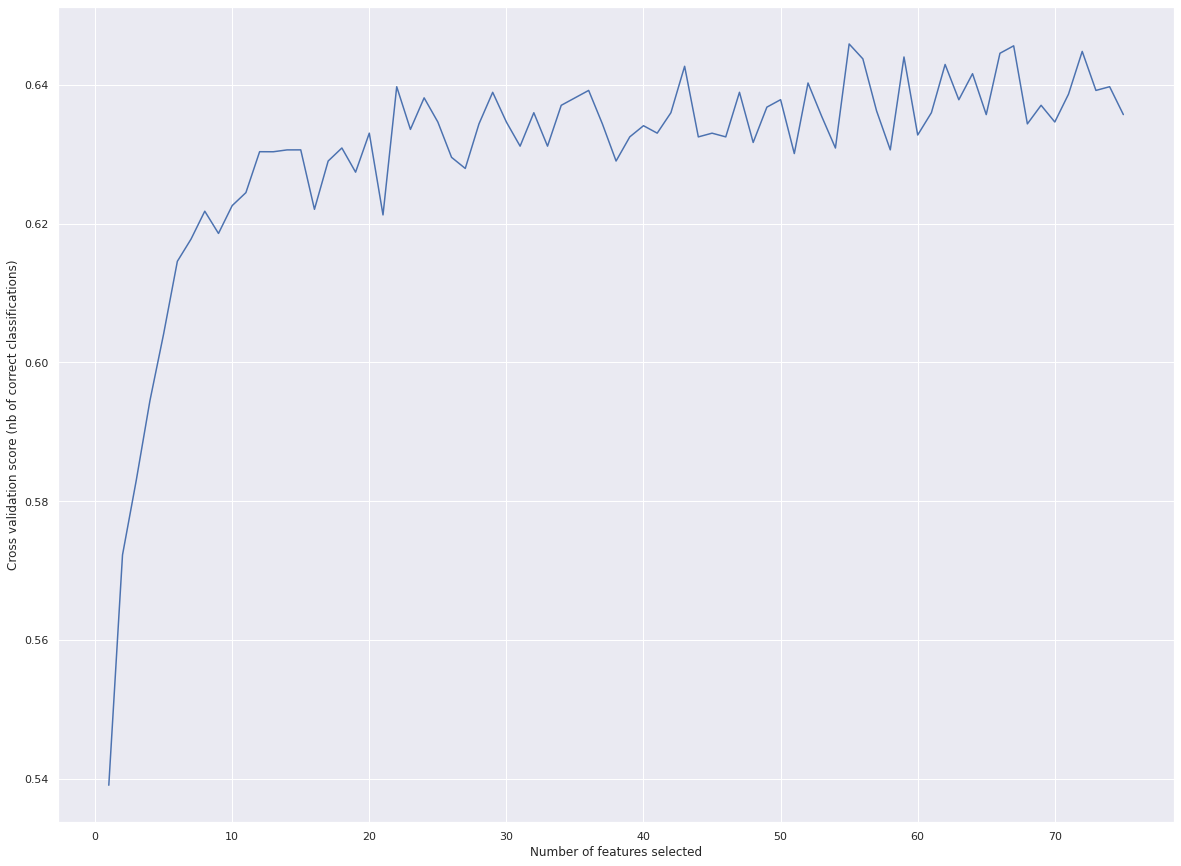

In [106]:
# Visaulize Cross Validation
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1),selector.grid_scores_)
plt.show()


In [ ]:
# Transform the training and test data to include only the selected features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

## Define paramters to hypertune in Sklearn's RFC Model
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the Random Forest Classifier
rfc = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_selected, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
sns.barplot(data =pd.DataFrame([rfc.feature_importances_,X_train.columns[selector.support_]]).T.rename({0:'feature_importance',1:'feature'},
axis=1).sort_values(by='feature_importance',ascending=False).iloc[:10],x='feature',y='feature_importance')


In [ ]:
params = grid_search.best_params_

## Fit final RFC Model with best parameters obtained from the Grid Search
rfc = RandomForestClassifier(max_depth= params['max_depth'],max_features=params['max_features'],
        min_samples_leaf=params['min_samples_leaf'],min_samples_split=params['min_samples_split'],n_estimators=params['n_estimators'] )
rfc.fit(X_train_selected,y_train)

## Predict on test set
preds = rfc.predict(X_test_selected)

## Results & Metrics
Now we evaluate our model based on common classification metrics:
- Accuracy: TP + TN / (TP+TN+FP+FN), measures total accuracy of our model.
- Precision: TP / (TP + FP), focuses on accuracy of positive predictions.
- Recall: TP / (TP + FN), focuses on model's ability to classify positive samples
- Specificity: TN / (TN + FP), focuses on model's ability to classify negative samples

We have to remember how we binarized our labels, where a positive sample indicates the blue corner (underdog wins) and a negative samples indicates the red corner (favorite) wins. 

In [ ]:
precision = precision_score(y_test,preds)
recall = recall_score(y_test,preds)
accuracy = accuracy_score(y_test,preds)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
specificity = tn / (tn + fp)
# print the results
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Specificity: {specificity:.3f}")

In [ ]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, linewidths=.5, fmt= '.1f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

Our accuracy on our test set is 62%, which performs worse than just going based off the odds that betting lines creates. The difference between our recall and specificity is outstanding, as our recall is low at 25% and our specificity score is high at 90%. This is intuitively correct as our model is having a hard time to predict when the underdog wins. The inherent randomness of fights where every fighter has a punchers chance, and being a sport where anything can happend and anyone can win on a given day, the model is doing a poor job of predicting when the underdog wins.

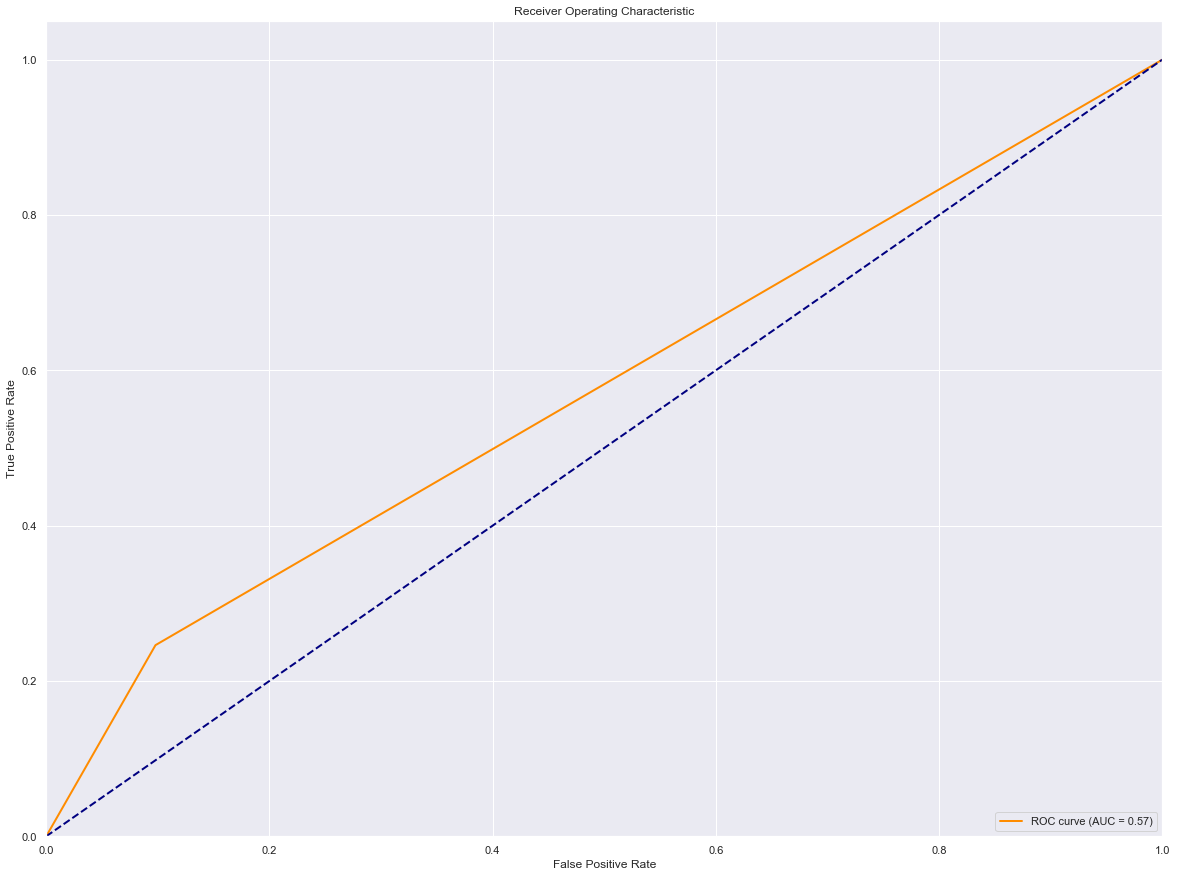

In [50]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [109]:
def make_soup(url: str) -> BeautifulSoup:
    source_code = requests.get(url, allow_redirects=False)
    plain_text = source_code.text.encode("ascii", "replace")
    return BeautifulSoup(plain_text, "html.parser")
all_events_url="http://ufcstats.com/statistics/events/completed?page=all"
html = requests.get(all_events_url)
soup = BeautifulSoup(html.text)
all_event_links = []
for link in soup.findAll("td", {"class": "b-statistics__table-col"}):
    for href in link.findAll("a"):
        foo = href.get("href")
        all_event_links.append(foo)

In [110]:
event_and_fight_links = {}
event_links = all_event_links
l = len(event_links)

for index, link in enumerate(event_links):
    event_fights = []
    soup = make_soup(link)
    for row in soup.findAll(
        "tr",
        {
            "class": "b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click"
        },
    ):
        href = row.get("data-link")
        event_fights.append(href)
    event_and_fight_links[link] = event_fights

In [ ]:
fight = event_and_fight_links[list(event_and_fight_links)[0]][0]
fight_soup = make_soup(fight)
fighter_links = fight_soup.find_all('a',{'class':"b-link b-fight-details__person-link"})
num_of_fights_r = len(make_soup(fighter_links[0]['href']).findAll('tr', {"class":"b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click"}))
num_of_fights_b = len(make_soup(fighter_links[1]['href']).findAll('tr', {"class":"b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click"}))

In [ ]:
make_soup(fighter_links[0]['href']).findAll('tr', {"class":"b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click"})[0]['data-link']

In [ ]:
vals = []
for i in make_soup('http://ufcstats.com/fight-details/1f0d4572e0facbea').findAll('p', {"class": "b-fight-details__table-text"}):
    vals.append(i.text.strip())

In [ ]:
cols_list = []
for i in make_soup('http://ufcstats.com/fight-details/1f0d4572e0facbea').findAll('th', {"class":"b-fight-details__table-col"}):
    cols_list.append(i.text.strip())

In [ ]:
a = dict()
a[vals[0]] = vals[2:][::2]
a[vals[1]] = vals[2:][1::2]

In [ ]:
misc=make_soup('http://ufcstats.com/fight-details/1f0d4572e0facbea').findAll('i', {'class':"b-fight-details__text-item"})
fight_round = int(misc[0].text.strip()[-1])
method = make_soup('http://ufcstats.com/fight-details/1f0d4572e0facbea').findAll('i', {'style':"font-style: normal"})[0].text.strip()
fight_time =misc[1].text.strip().split(' ')[-1]
title_fight = 'Title' in make_soup('http://ufcstats.com/fight-details/1f0d4572e0facbea').findAll('i', {'class':"b-fight-details__fight-title"})[0].text.strip()
weight_class = re.findall('[A-Za-z]*weight',make_soup('http://ufcstats.com/fight-details/1f0d4572e0facbea').findAll('i', {'class':"b-fight-details__fight-title"})[0].text.strip())[0]

In [ ]:
all_lists = []
final_lists = []
for fighter in a.keys():
    sub_list = []
    for i in a[fighter]:
        if i ==fighter:
            all_lists.append(sub_list)
            sub_list = []
        else:
            sub_list.append(i)
    final_lists.append(all_lists[::fight_round+1])
    all_lists = []

In [ ]:
new_df = pd.DataFrame(columns=data.columns)
R = combined_data[combined_data.fighter==vals[0]].sort_values(by='date',ascending=False).iloc[1]
B = combined_data[combined_data.fighter==vals[1]].sort_values(by='date',ascending=False).iloc[1]

new_df['R_fighter'] = vals[0]
new_df['B_fighter'] = vals[1]
new_df['title_bout'] = title_fight
new_df['weight_class'] = weight_class
# new_df['B_avg_KD'] = 
row = [vals[0],vals[1],'NA','NA','NA','NA',title_fight,weight_class,]

In [ ]:
B['avg_KD']
final_lists[1][0]

In [ ]:
fighter_links